# Customer Segmentation Data Generation and Validation

This notebook generates synthetic data for a customer segmentation project and performs various data validation and integrity checks.

## Author

Ekin Derdiyok<br>
Email: [ekin.derdiyok@icloud.com](mailto:ekin.derdiyok@icloud.com)<br>
GitHub: [github.com/ekinderdiyok](https://github.com/ekinderdiyok)<br>  

## Table of Contents
1. [Introduction](#Introduction)
2. [Data Generation](#Data-Generation)
    - [Customers Table](#Customers-Table)
    - [Orders Table](#Orders-Table)
    - [Loyalty Programs Table](#Loyalty-Programs-Table)
    - [Customer Loyalty Table](#Customer-Loyalty-Table)
3. [Data Validation and Integrity Checks](#Data-Validation-and-Integrity-Checks)
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)

## Introduction
This notebook uses the `Faker` library to generate synthetic data for customers, orders, loyalty programs, and customer loyalty memberships. The generated data is then saved to CSV files for use in a customer segmentation project. Additionally, the notebook includes data validation and integrity checks to ensure the accuracy and consistency of the generated data.

## Data Generation
### Customers Table
The customers table includes the following fields:
- `customer_id`: Unique identifier for each customer
- `name`: Customer's name
- `email`: Customer's email address
- `registration_date`: Date when the customer registered
- `gender`: Customer's gender (M, F, D)
- `birth_date`: Customer's birth date
- `newsletter`: Whether the customer is subscribed to the newsletter
- `postal_code`: Customer's postal code
- `country_code`: Customer's country code (DE, AT, CH)
- `is_plus_member`: Whether the customer is a plus member

### Orders Table
The orders table includes the following fields:
- `order_id`: Unique identifier for each order
- `customer_id`: Identifier for the customer who placed the order
- `order_date`: Date when the order was placed
- `total_amount`: Total amount of the order
- `is_onsite`: Whether the order was placed onsite

### Loyalty Programs Table
The loyalty programs table includes the following fields:
- `program_id`: Unique identifier for each loyalty program
- `program_name`: Name of the loyalty program
- `description`: Description of the loyalty program

### Customer Loyalty Table
The customer loyalty table includes the following fields:
- `customer_id`: Identifier for the customer
- `program_id`: Identifier for the loyalty program
- `membership_start_date`: Date when the membership started

## Data Validation and Integrity Checks
The notebook performs the following data validation and integrity checks:
- Ensures no missing values in the data
- Verifies that `customer_id` in the orders and customer loyalty tables exists in the customers table
- Checks that `registration_date` comes before `order_date` and `membership_start_date`

## Data Exploration
The notebook also includes exploratory data analysis to provide insights into the generated data, such as:
- Number of customers and orders
- Maximum order amount
- Earliest and latest order dates
- Oldest customer and first registered customer
- Distribution of customers by gender, country, and subscription status

## How to Run
To run this notebook, you need to have the following Python packages installed:
- `pandas`
- `numpy`
- `faker`

You can install the required packages using:
```bash
pip install pandas numpy faker


In [26]:
import csv
from faker import Faker
import random
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generate data for `customers` table

In [27]:
# Initialize Faker
fake = Faker()

# Define the number of records you want to generate
num_records = 1000

# Define functions to generate data
def generate_gender():
    return random.choice(['M', 'F', 'D'])

def generate_country_code():
    return random.choice(['DE', 'AT', 'CH'])

def generate_boolean():
    return random.choice([True, False])

def generate_birth_date():
    age_groups = [(18, 25), (26, 35), (36, 50), (51, 65), (66, 80)]
    probabilities = [0.4, 0.3, 0.2, 0.08, 0.02]
    age_group = random.choices(age_groups, probabilities)[0]
    return fake.date_of_birth(minimum_age=age_group[0], maximum_age=age_group[1])

# Generate customers data
customers = []
for i in range(1, num_records + 1):
    registration_date = fake.date_between(start_date='-3y', end_date='today')
    customers.append({
        'customer_id': i,
        'name': fake.name(),
        'email': fake.unique.email(),
        'registration_date': registration_date,
        'gender': generate_gender(),
        'birth_date': generate_birth_date(),
        'newsletter': generate_boolean(),
        'postal_code': fake.postcode(),
        'country_code': generate_country_code(),
        'is_plus_member': generate_boolean(),
        'registration_date': registration_date
    })

customers_df = pd.DataFrame(customers)
customers_df.to_csv('/Users/ekinderdiyok/Documents/projects/customer-segmentation/data/customers.csv', index=False)

print("Customer data generation complete. The data has been saved to 'customers.csv'.")

Customer data generation complete. The data has been saved to 'customers.csv'.


## Generate data for `loyalty_programs` table

In [28]:
# Create data for the loyalty_programs table
loyalty_programs = {
    "program_id": [1, 2, 3],
    "program_name": ["Nike", "Polo Ralph Lauren", "Zign"],
    "description": [
        "Nike's loyalty program offers exclusive discounts, early access to new products, and free shipping for members.",
        "Polo Ralph Lauren's loyalty program provides members with exclusive offers, early access to new collections, personalized styling sessions, and invitations to private events.",
        "Zign's loyalty program offers exclusive access to eco-friendly collections, early previews of upcoming sustainable fashion lines, and personalized style consultations, reflecting our commitment to sustainability and contemporary elegance."
    ]
}
loyalty_programs_df = pd.DataFrame(loyalty_programs)
loyalty_programs_df.to_csv("/Users/ekinderdiyok/Documents/projects/customer-segmentation/data/loyalty_programs.csv", index=False)

print("Loyalty programs data generation complete. The data has been saved to 'loyalty_programs.csv'.")

Loyalty programs data generation complete. The data has been saved to 'loyalty_programs.csv'.


## Generate data for `customer_loyalty` table

In [9]:
# Function to calculate age from birth date
def calculate_age(birth_date):
    today = datetime.today()
    return today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))

# Generate customer loyalty data with age-based probabilities
num_memberships = 500
customer_loyalty_data = {
    "customer_id": [],
    "program_id": [],
    "membership_start_date": []
}

# Create a set to track unique (customer_id, program_id) combinations
unique_combinations = set()

while len(unique_combinations) < num_memberships:
    customer = random.choice(customers)
    age = calculate_age(customer['birth_date'])
    
    # Define probabilities based on age
    if age < 35:
        program_probabilities = [0.7, 0.2, 0.1]  # Higher chance for Nike, lower for Polo Ralph Lauren
    elif age >= 35:
        program_probabilities = [0.1, 0.7, 0.2]  # Higher chance for Polo Ralph Lauren, lower for Nike

    program_id = random.choices(loyalty_programs['program_id'], program_probabilities)[0]
    combination = (customer['customer_id'], program_id)
    
    # Ensure the combination is unique
    if combination not in unique_combinations:
        unique_combinations.add(combination)
        membership_start_date = fake.date_between(start_date=customer['registration_date'], end_date='today')
        customer_loyalty_data["customer_id"].append(customer['customer_id'])
        customer_loyalty_data["program_id"].append(program_id)
        customer_loyalty_data["membership_start_date"].append(membership_start_date)

customer_loyalty_df = pd.DataFrame(customer_loyalty_data)
customer_loyalty_df.to_csv("/Users/ekinderdiyok/Documents/projects/customer-segmentation/data/customer_loyalty.csv", index=False)

print("Customer loyalty data generation complete. The data has been saved to 'customer_loyalty.csv'.")

Customer loyalty data generation complete. The data has been saved to 'customer_loyalty.csv'.


## Generate data for `orders` table

In [19]:
# Generate orders data
orders = []
order_id = 1

for customer in customers:
    age = (pd.to_datetime('today') - pd.to_datetime(customer['birth_date'])).days / 365.25

    # Check if the customer is in the Nike loyalty program
    in_nike_program = customer['customer_id'] in customer_loyalty_df[customer_loyalty_df['program_id'] == 1]['customer_id'].values
    
    # Scale number of orders inversely with age (more orders for younger customers)
    max_orders = 10
    min_orders = 1
    base_orders = int(max_orders - (max_orders - min_orders) * (age / 80))

    # Increase orders by 50% for Nike program members aged 18-24
    if age >= 18 and age <= 24 and in_nike_program:
        num_orders_customer = int(base_orders * 1.5)
    else:
        num_orders_customer = base_orders

    # Scale total amount with age (higher amount for older customers)
    max_amount_mean = 250
    min_amount_mean = 30
    amount_mean = min_amount_mean + (max_amount_mean - min_amount_mean) * (age / 80)
    amount_std = amount_mean * 0.3

    for _ in range(num_orders_customer):
        order_date = fake.date_between(start_date=customer['registration_date'], end_date='today')
        total_amount = min(max(np.random.normal(amount_mean, amount_std), 10.0), 1000.0)
        orders.append({
            'order_id': order_id,
            'customer_id': customer['customer_id'],
            'order_date': order_date,
            'total_amount': round(total_amount, 2),
            'is_onsite': random.choices([False, True], weights=[80, 20])[0]
        })
        order_id += 1

orders_df = pd.DataFrame(orders)
orders_df.to_csv('/Users/ekinderdiyok/Documents/projects/customer-segmentation/data/orders.csv', index=False)

print("Orders data generation complete. The data has been saved to 'orders.csv'.")

Orders data generation complete. The data has been saved to 'orders.csv'.


## Generate data for `brands` table

In [20]:
import pandas as pd

# Create data for the brands table
brands = {
    "brand_id": [1, 2, 3],
    "brand_name": ["Polo Ralph Lauren", "Zign", "Nike"]
}

brands_df = pd.DataFrame(brands)
brands_df.to_csv("/Users/ekinderdiyok/Documents/projects/customer-segmentation/data/brands.csv", index=False)

print("Brands data generation complete. The data has been saved to 'brands.csv'.")

Brands data generation complete. The data has been saved to 'brands.csv'.


## Generate data for `order_brands` table

In [21]:
# Get the brand_id for Polo Ralph Lauren and Nike
polo_ralph_lauren_id = brands_df.loc[brands_df['brand_name'] == 'Polo Ralph Lauren', 'brand_id'].values[0]
nike_id = brands_df.loc[brands_df['brand_name'] == 'Nike', 'brand_id'].values[0]

# Prepare the order_brands data
order_brands_data = {
    "order_id": [],
    "brand_id": []
}

# Define probabilities for number of brands per order
probabilities = [0.7, 0.2, 0.1]  # Probabilities for 1, 2, and 3 brands per order respectively

for _, order in orders_df.iterrows():
    num_brands = random.choices([1, 2, 3], probabilities)[0]
    selected_brands = random.sample(list(brands['brand_id']), num_brands)
    
    # Increase the probability of including Polo Ralph Lauren for older customers
    customer = customers_df.loc[customers_df['customer_id'] == order['customer_id']].iloc[0]
    age = (pd.to_datetime(order['order_date']) - pd.to_datetime(customer['birth_date'])).days / 365.25
    
    if age > 50:
        if random.random() < 0.5:  # 50% chance to include Polo Ralph Lauren
            if polo_ralph_lauren_id not in selected_brands:
                selected_brands[random.randint(0, num_brands - 1)] = polo_ralph_lauren_id
    
    # Increase the probability of including Nike for customers aged 24 or below
    if age <= 24:
        if random.random() < 0.5:  # 50% chance to include Nike
            if nike_id not in selected_brands:
                selected_brands[random.randint(0, num_brands - 1)] = nike_id
    
    for brand_id in selected_brands:
        order_brands_data["order_id"].append(order['order_id'])
        order_brands_data["brand_id"].append(brand_id)

# Create DataFrame and save to CSV
order_brands_df = pd.DataFrame(order_brands_data)
order_brands_df.to_csv("/Users/ekinderdiyok/Documents/projects/customer-segmentation/data/order_brands.csv", index=False)

print("Order brands data generation complete. The data has been saved to 'order_brands.csv'.")

Order brands data generation complete. The data has been saved to 'order_brands.csv'.


## Data Validation and Integrity Checks

In [22]:
# Load the data
customers_df = pd.read_csv('/Users/ekinderdiyok/Documents/projects/customer-segmentation/data/customers.csv')
orders_df = pd.read_csv('/Users/ekinderdiyok/Documents/projects/customer-segmentation/data/orders.csv')
customer_loyalty_df = pd.read_csv('/Users/ekinderdiyok/Documents/projects/customer-segmentation/data/customer_loyalty.csv')

# Ensure no missing values
assert customers_df.notnull().all().all(), "There are missing values in customers data"
assert orders_df.notnull().all().all(), "There are missing values in orders data"
assert customer_loyalty_df.notnull().all().all(), "There are missing values in customer loyalty data"

# Ensure customer_id in orders and customer_loyalty exists in customers
assert set(orders_df['customer_id']).issubset(set(customers_df['customer_id'])), "Orders contain customer_ids not present in customers"
assert set(customer_loyalty_df['customer_id']).issubset(set(customers_df['customer_id'])), "Customer loyalty contains customer_ids not present in customers"

# Ensure registration_date comes before order_date and membership_start_date
orders_merged_df = orders_df.merge(customers_df, on='customer_id', how='left')
orders_merged_df['registration_date'] = pd.to_datetime(orders_merged_df['registration_date'])
orders_merged_df['order_date'] = pd.to_datetime(orders_merged_df['order_date'])

# Check if registration_date is before order_date
orders_check = orders_merged_df['registration_date'] <= orders_merged_df['order_date']
orders_check_result = orders_check.all()

loyalty_merged_df = customer_loyalty_df.merge(customers_df, on='customer_id', how='left')
loyalty_merged_df['registration_date'] = pd.to_datetime(loyalty_merged_df['registration_date'])
loyalty_merged_df['membership_start_date'] = pd.to_datetime(loyalty_merged_df['membership_start_date'])

# Check if registration_date is before membership_start_date
loyalty_check = loyalty_merged_df['registration_date'] <= loyalty_merged_df['membership_start_date']
loyalty_check_result = loyalty_check.all()

# Print the results
if orders_check_result and loyalty_check_result:
    print("All checks passed: registration_date is before both order_date and membership_start_date for all records.")
else:
    if not orders_check_result:
        print("Error: There are some orders with order_date earlier than registration_date.")
    if not loyalty_check_result:
        print("Error: There are some customer loyalty memberships with membership_start_date earlier than registration_date.")

All checks passed: registration_date is before both order_date and membership_start_date for all records.


## Data Exploration

In [23]:
# Ensure dates are in datetime format
customers_df['birth_date'] = pd.to_datetime(customers_df['birth_date'])
customers_df['registration_date'] = pd.to_datetime(customers_df['registration_date'])
orders_df['order_date'] = pd.to_datetime(orders_df['order_date'])

# Exploratory Data Info
num_customers = customers_df.shape[0]
num_orders = orders_df.shape[0]
max_order_amount = orders_df['total_amount'].max()
earliest_order_date = orders_df['order_date'].min()
oldest_customer = customers_df.loc[customers_df['birth_date'].idxmin()]
first_customer = customers_df.loc[customers_df['registration_date'].idxmin()]

print(f"Number of customers: {num_customers}")
print(f"Number of orders: {num_orders}")
print(f"Max order amount: {max_order_amount}")
print(f"Earliest order date: {earliest_order_date}")
print(f"Oldest customer:\n{oldest_customer}")
print(f"First customer:\n{first_customer}")

# Additional exploratory info
num_male_customers = customers_df[customers_df['gender'] == 'M'].shape[0]
num_female_customers = customers_df[customers_df['gender'] == 'F'].shape[0]
num_diverse_customers = customers_df[customers_df['gender'] == 'D'].shape[0]
num_plus_members = customers_df[customers_df['is_plus_member']].shape[0]
num_newsletter_subscribers = customers_df[customers_df['newsletter']].shape[0]
most_common_country = customers_df['country_code'].mode()[0]

print(f"Number of male customers: {num_male_customers}")
print(f"Number of female customers: {num_female_customers}")
print(f"Number of diverse customers: {num_diverse_customers}")
print(f"Number of plus members: {num_plus_members}")
print(f"Number of newsletter subscribers: {num_newsletter_subscribers}")
print(f"Most common country: {most_common_country}")

# Additional date-related info
latest_registration_date = customers_df['registration_date'].max()
latest_order_date = orders_df['order_date'].max()

print(f"Latest registration date: {latest_registration_date}")
print(f"Latest order date: {latest_order_date}")


Number of customers: 1000
Number of orders: 6108
Max order amount: 381.08
Earliest order date: 2021-08-21 00:00:00
Oldest customer:
customer_id                                116
name                               Roy Rowland
email                michelemurphy@example.org
registration_date          2022-11-24 00:00:00
gender                                       F
birth_date                 1943-09-21 00:00:00
newsletter                               False
postal_code                              10695
country_code                                DE
is_plus_member                           False
Name: 115, dtype: object
First customer:
customer_id                                  284
name                              Kyle Dougherty
email                alexanderthomas@example.com
registration_date            2021-07-23 00:00:00
gender                                         D
birth_date                   1977-01-08 00:00:00
newsletter                                  True
postal_code   

## Check if age x brand split is successful

In [24]:
# Divide customers into age buckets and show brand breakdown
customers_df['age'] = customers_df['birth_date'].apply(lambda x: (pd.to_datetime('today') - pd.to_datetime(x)).days / 365.25)
age_buckets = {
    '24_and_below': customers_df[customers_df['age'] <= 24],
    'between_25_and_49': customers_df[(customers_df['age'] > 24) & (customers_df['age'] <= 49)],
    '50_and_above': customers_df[customers_df['age'] >= 50]
}

# Load order_brands data
order_brands = pd.read_csv("/Users/ekinderdiyok/Documents/projects/customer-segmentation/data/order_brands.csv")

# Function to get brand breakdown for an age bucket
def get_brand_breakdown(age_bucket_customers):
    customer_ids = age_bucket_customers['customer_id'].tolist()
    relevant_orders = orders_df[orders_df['customer_id'].isin(customer_ids)]
    relevant_order_ids = relevant_orders['order_id'].tolist()
    relevant_order_brands = order_brands[order_brands['order_id'].isin(relevant_order_ids)]
    
    total_brands = len(relevant_order_brands)
    brand_counts = relevant_order_brands['brand_id'].value_counts().rename_axis('brand_id').reset_index(name='counts')
    brand_counts = brand_counts.merge(brands_df, on='brand_id', how='left')
    brand_counts['percentage'] = (brand_counts['counts'] / total_brands) * 100
    
    return brand_counts[['brand_name', 'percentage']]


# Get brand breakdowns for each age bucket
brand_breakdown_24_and_below = get_brand_breakdown(age_buckets['24_and_below'])
brand_breakdown_25_to_49 = get_brand_breakdown(age_buckets['between_25_and_49'])
brand_breakdown_50_and_above = get_brand_breakdown(age_buckets['50_and_above'])

# Display brand breakdowns
print("Brand breakdown for customers aged 24 and below:")
print(brand_breakdown_24_and_below)

print("\nBrand breakdown for customers aged between 25 and 49:")
print(brand_breakdown_25_to_49)

print("\nBrand breakdown for customers aged 50 and above:")
print(brand_breakdown_50_and_above)

Brand breakdown for customers aged 24 and below:
          brand_name  percentage
0               Nike   51.662404
1  Polo Ralph Lauren   24.637681
2               Zign   23.699915

Brand breakdown for customers aged between 25 and 49:
          brand_name  percentage
0               Nike   34.047724
1  Polo Ralph Lauren   33.893062
2               Zign   32.059213

Brand breakdown for customers aged 50 and above:
          brand_name  percentage
0  Polo Ralph Lauren   51.648352
1               Zign   25.274725
2               Nike   23.076923


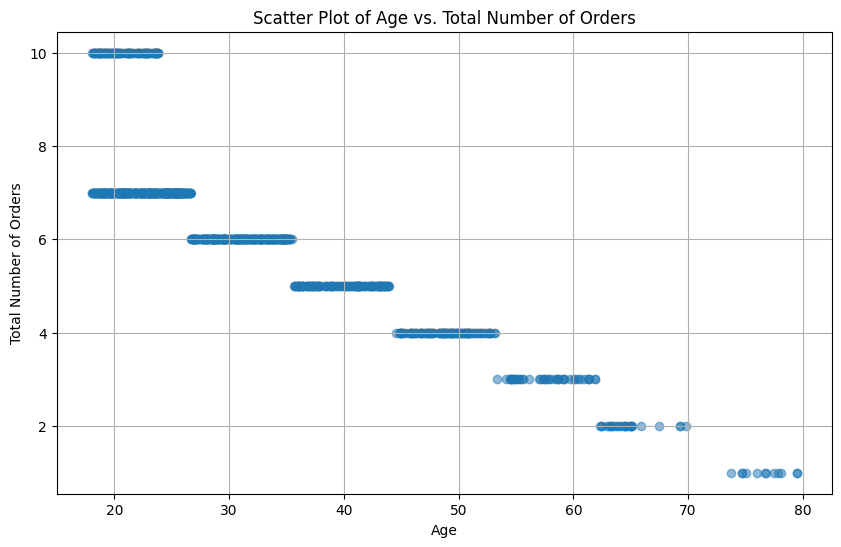

In [18]:
# Scatter plot: Age on x-axis and total number of orders on y-axis
customer_order_counts = orders_df['customer_id'].value_counts().rename_axis('customer_id').reset_index(name='total_orders')
customer_order_counts = customer_order_counts.merge(customers_df[['customer_id', 'age']], on='customer_id')

plt.figure(figsize=(10, 6))
plt.scatter(customer_order_counts['age'], customer_order_counts['total_orders'], alpha=0.5)
plt.title('Scatter Plot of Age vs. Total Number of Orders')
plt.xlabel('Age')
plt.ylabel('Total Number of Orders')
plt.grid(True)
plt.show()

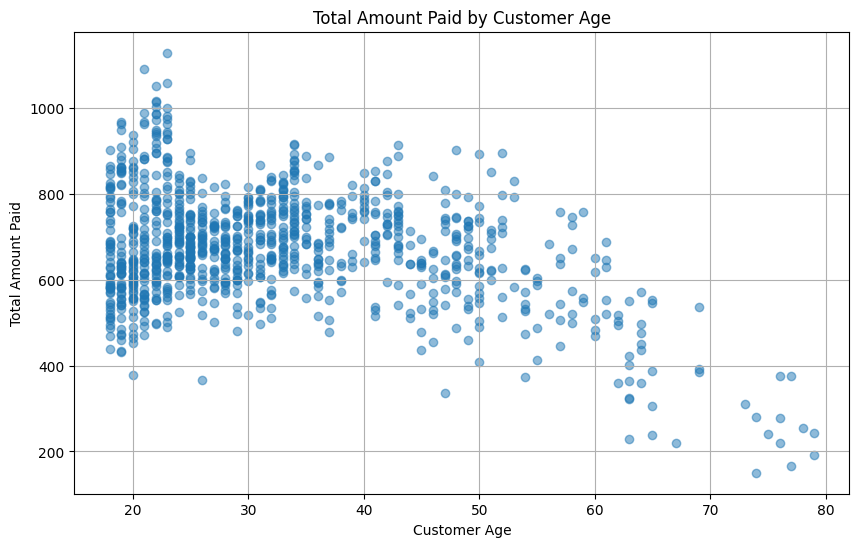

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the data
customers_df = pd.read_csv('/Users/ekinderdiyok/Documents/projects/customer-segmentation/data/customers.csv')
orders_df = pd.read_csv('/Users/ekinderdiyok/Documents/projects/customer-segmentation/data/orders.csv')

# Calculate customer age
customers_df['birth_date'] = pd.to_datetime(customers_df['birth_date'])
customers_df['age'] = (datetime.now() - customers_df['birth_date']).astype('<m8[Y]')

# Calculate total amount paid by each customer
total_amount_per_customer = orders_df.groupby('customer_id')['total_amount'].sum().reset_index()
total_amount_per_customer.columns = ['customer_id', 'total_amount']

# Merge with customers data
merged_df = pd.merge(customers_df, total_amount_per_customer, on='customer_id')

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['age'], merged_df['total_amount'], alpha=0.5)
plt.title('Total Amount Paid by Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Total Amount Paid')
plt.grid(True)
plt.show()


In [8]:
# End of the script